In [1]:
from model.data import StackedMNIST
from model.train.autoencoder.autoencoder import AutoEncoder
from model.train.autoencoder.ae_trainer import AutoEncoderTrainer

from model.settings import *
from model.test.verification_net import VerificationNet

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader

from tqdm import tqdm
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
from model.utils import get_gpu
get_gpu()

Using GPU MPS: (0.00 GB available) driver memory: 0.00 GB


In [4]:
trainset = StackedMNIST(train=True, mode=AE_DATAMODE)
testset = StackedMNIST(train=False, mode=AE_DATAMODE)

/Users/arthurtestard/envs/ntnu/deeplearning/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [5]:
trainer = AutoEncoderTrainer()

device: mps


In [18]:
trainer.force_relearn = True

In [19]:
trainer.train(trainset=trainset,valset=testset)

100%|██████████| 10/10 [02:08<00:00, 12.89s/it]


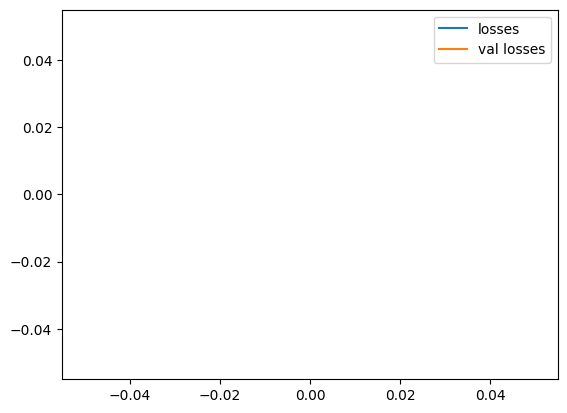

In [7]:
plt.plot(trainer.losses, label="losses")
plt.plot(trainer.val_losses, label="val losses")
plt.legend()

In [8]:
# Trainer = Trainer.load_trainer(trainer_file)

In [9]:
train_set = DataLoader(trainset, shuffle=True, batch_size=2048)
test_set = DataLoader(testset, shuffle=True, batch_size=2048)

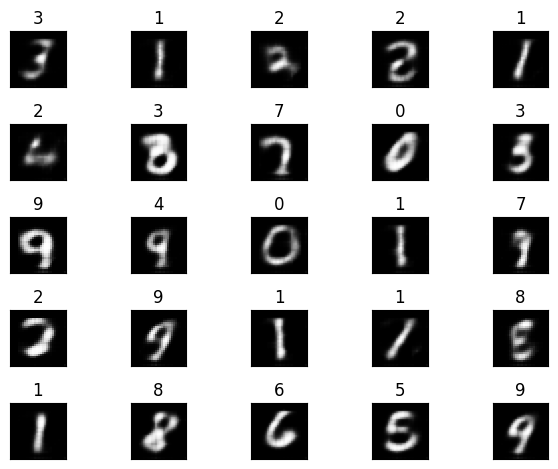

In [10]:
trainer.print_reconstructed_img(testset)


In [14]:
verifNet = VerificationNet()


In [15]:
trainer.print_class_coverage_and_predictability(verifNet, trainset)

Coverage: 100.00%
Predictability: 95.79%
Accuracy: 82.98%


In [16]:
trainer.print_class_coverage_and_predictability(verifNet, testset)


Coverage: 100.00%
Predictability: 96.18%
Accuracy: 83.72%
